In [383]:
import pandas as pd
import numpy as np
import torch, torchhd

In [384]:
df = pd.read_csv('english_news.csv', delimiter='\t', header=0) #non usare delimiter e sep insieme                                                          
df

,source,date,title,author,text
0,Mainichi Shimbun,2021-12-06,"Editorial: Japan govt's 20,000-yen handout mis...",NaN,The Japanese government is trying to boost the...
1,Mainichi Shimbun,2021-12-07,Editorial: Time for Japan PM Kishida to delive...,NaN,"Prime Minister Fumio Kishida, who won a public..."
2,Mainichi Shimbun,2021-12-08,"Editorial: 80 years on from Pearl Harbor, acti...",NaN,It has been 80 years since the start of the Pa...
3,Mainichi Shimbun,2021-12-08,"Yoroku: 80 years later, many lessons still not...",NaN,"""The world has changed completely. The era was..."
4,Mainichi Shimbun,2021-12-08,Promoting respect for human rights behind US '...,NaN,The U.S. administration under President Joe Bi...
...,...,...,...,...,...
36884,The Japan Times,2021-06-06,COVID-19 tracker: Tokyo reports 351 new cases ...,NaN,Tokyo confirmed 351 new cases of COVID-19 on S...
36885,The Japan Times,2021-06-07,Dollar weakens to around ¥109.40 in Tokyo,NaN,The dollar eased to around ¥109.40 in Tokyo tr...
36886,The Japan Times,2021-06-07,"Nikkei ends higher, but gains limited",NaN,The benchmark Nikkei average turned higher on ...
36887,The Japan Times,2021-06-07,COVID-19 tracker: Osaka reports 72 new cases b...,NaN,Osaka Prefecture reported 72 new COVID-19 case...


In [385]:
print(df.info()) # da qui notiamo come author e text hanno dei valori NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36889 entries, 0 to 36888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36889 non-null  object
 1   date    36889 non-null  object
 2   title   36889 non-null  object
 3   author  12846 non-null  object
 4   text    36766 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB
None


In [386]:
df = df.dropna(subset=['text']) # per ora elimino solo i NaN su date e testi che sono quelli che interessano per la classificazione

print(df.info()) # da qui notiamo come author e text hanno dei valori NaN
print(df.describe())

df['text'] = df['text'].apply(lambda x: x.lower()) 

for char in [':', '.', ';', ',', '+', '-', '(', ')', '[', ']', '!', '?', '@', '$', '&', '#', '|', '^', '_', '-']:
    df['text'] = df['text'].apply(lambda x: x.replace(':', ''))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36766 entries, 0 to 36888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36766 non-null  object
 1   date    36766 non-null  object
 2   title   36766 non-null  object
 3   author  12724 non-null  object
 4   text    36766 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
                 source        date               title         author  \
count             36766       36766               36766          12724   
unique                2        1495               35936           1316   
top     The Japan Times  2003-06-06  KANSAI: Who & What  Philip Brasor   
freq              36692          66                  23            318   

                                                     text  
count                                               36766  
unique                                              35932  
top     This could be due to a conflict with

C:\Users\giaco\AppData\Local\Temp\ipykernel_10672\1534463384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower())
C:\Users\giaco\AppData\Local\Temp\ipykernel_10672\1534463384.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.replace(':', ''))


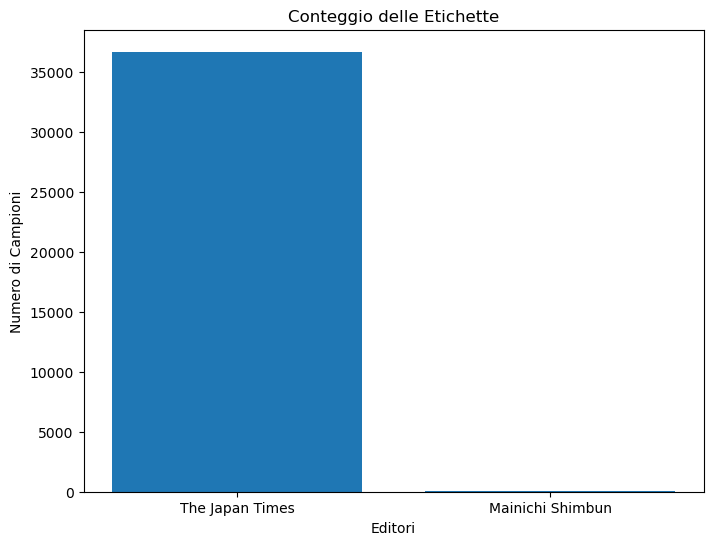

The Japan Times     36692
Mainichi Shimbun       74
Name: source, dtype: int64


In [387]:
import matplotlib.pyplot as plt

label_counts = df['source'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Editori')
plt.ylabel('Numero di Campioni')
plt.title('Conteggio delle Etichette')
plt.show()

# dataset altamente sbilanciato
print(label_counts)

In [388]:
df_filtered = df[df['source'] == 'The Japan Times'].sample(n=74)

In [389]:
df_final = pd.concat([df_filtered, df[df['source'] == 'Mainichi Shimbun']])

In [390]:
df_final.describe()

,source,date,title,author,text
count,148,148,148,29,148
unique,2,131,148,26,148
top,The Japan Times,2021-12-08,North hits Japan leadership shuffle,Rowan Hooper,beijing –north korea on wednesday ridiculed ja...
freq,74,3,1,2,1


### SVM classifier

Accuracy: 1.00000


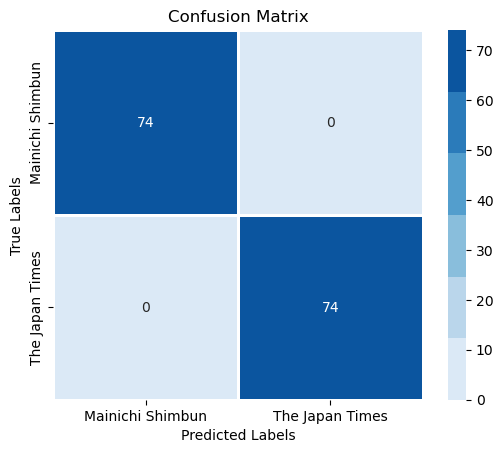

In [391]:
# nel momento in cui le classi, le etichette, sono solo due possiamo implementare una SVM come classificatore lineare

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_final['text'])

# Splitto in training e validation set
# X_train, X_val, y_train, y_val = train_test_split(X, df_final['source'], test_size=0.001, random_state=34)

X_train = X
y_train = df_final['source']


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")


cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=['Mainichi Shimbun', 'The Japan Times'], yticklabels=['Mainichi Shimbun', 'The Japan Times'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [392]:
df_complementare = df.drop(df[df['source'] == 'Mainichi Shimbun'].index)
df_complementare = df_complementare.drop(df_filtered.index)

df_complementare.describe()

,source,date,title,author,text
count,36618,36618,36618,12695,36618
unique,1,1439,35789,1312,35784
top,The Japan Times,2003-06-06,KANSAI: Who & What,Philip Brasor,this could be due to a conflict with your ad-b...
freq,36618,66,23,318,5


Accuracy: 0.99803


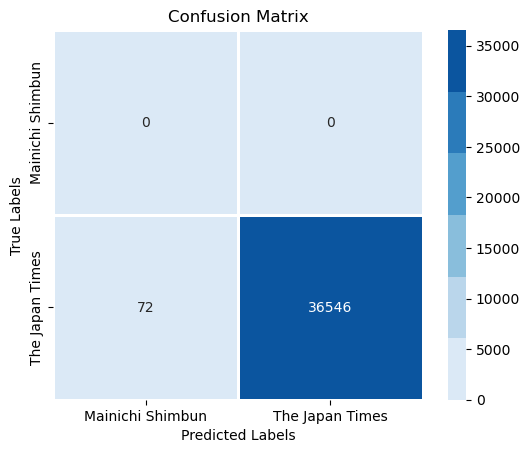

In [393]:
X_validation = df_complementare['text']
Y_validation = df_complementare['source']

# vectorizer = CountVectorizer()
X_validation = vectorizer.transform(X_validation)

y_pred_validation = svm_classifier.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=['Mainichi Shimbun', 'The Japan Times'], yticklabels=['Mainichi Shimbun', 'The Japan Times'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [394]:
# NOTE: effettuare l'undersampling ha portato a un migliroamento della precisione sul Manichi Shimbun,\
#  con annessa riduzione di tempo computazionale

# NOTE 2: se ci fossero stati più dati si sarebbe anche potuta fare K-folds; i risultati sono già soddisfacenti così

# NOTE 3: il vectorizer una volta fittato, lo uso solo per trasformare il testo (solo funzione transform)

# NOTE 4: provare option della class weight di sklearn per svm nel caso di classi non bilanciate

# NOTE 5: kernel Poly scartato per bassa validation accuracy, RBF performa peggio del linear sugli validation, anche il sigmoid

### Decision tree

Accuracy: 1.00000


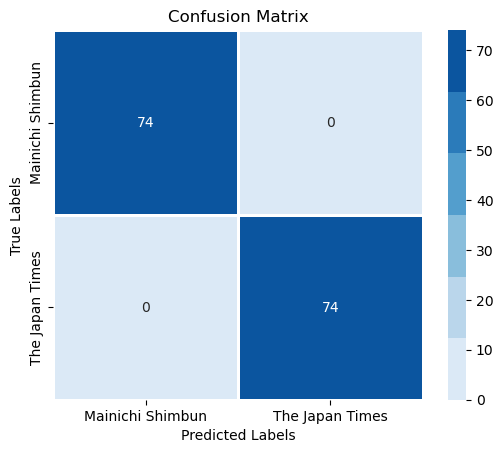

In [395]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=['Mainichi Shimbun', 'The Japan Times'], yticklabels=['Mainichi Shimbun', 'The Japan Times'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.99809


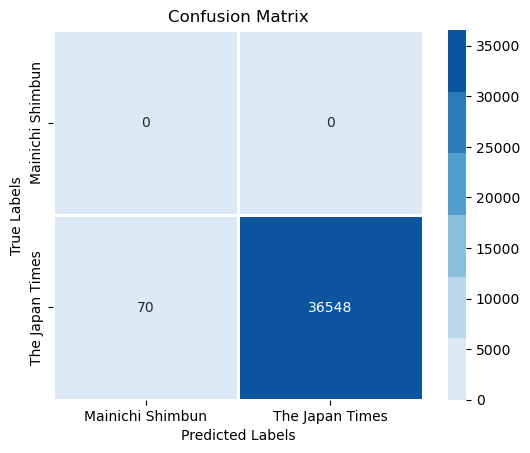

In [396]:
y_pred_validation = decision_tree.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=['Mainichi Shimbun', 'The Japan Times'], yticklabels=['Mainichi Shimbun', 'The Japan Times'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [397]:
# NOTE 1: aumento delle performance sugli validation anche se di poco

### Random forest

Accuracy: 1.00000


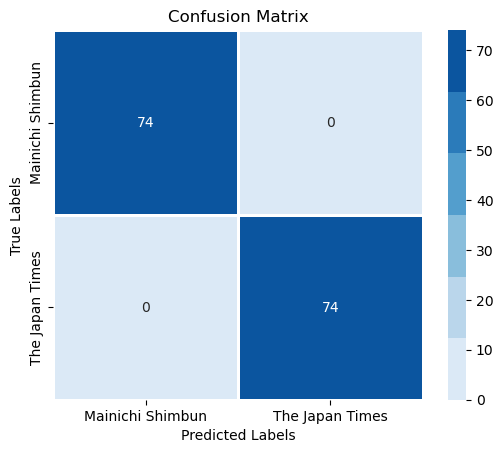

In [398]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_final['text'])

# Splitto in training e validation set
# X_train, X_val, y_train, y_val = train_test_split(X, df_final['source'], test_size=0.2, random_state=34)


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")


cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=['Mainichi Shimbun', 'The Japan Times'], yticklabels=['Mainichi Shimbun', 'The Japan Times'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.99801


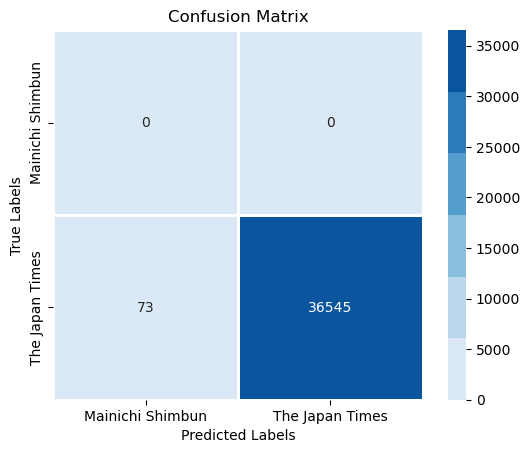

In [399]:
y_pred_validation = random_forest.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=['Mainichi Shimbun', 'The Japan Times'], yticklabels=['Mainichi Shimbun', 'The Japan Times'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Hyperdimensional Computing

In [400]:
# # strip di virgole e puntati, solo lettere e spazi e faccio i tetragrammi
# # giacomo beve un drink
# from tqdm.notebook import tqdm
# # costruzione del dizionario di riferimento per i tetragrammi
# d = 10000

# dict_tetragrammi = {}
# for text in tqdm(df['text']):
#     # elimino e replace punteggiatura
#     text = text.replace('.', '')
#     text = text.replace(';', '')
#     text = text.replace(':', '')
#     text = text.replace('-', '')
#     text = text.replace('_', '')
#     text = text.replace(',', '')
#     text = text.replace(',', '')
#     text = text.lower()
    
#     i = 0
#     while i != len(text)-2:
#         tetragramma = text[i:3]
#         i += 1

#         if i not in dict_tetragrammi.keys():
#             dict_tetragrammi[tetragramma] = torchhd.random(1,d)

In [401]:
# def text_to_vec(text, dict):

#     text = text.replace('.', '')
#     text = text.replace(':', '')
#     text = text.replace('-', '')
#     text = text.replace('_', '')
#     text = text.replace(',', '')
#     text = text.replace(';', '')
#     # text = text.replace('', '')

#     hv = np.array([])

#     i = 0
#     while i != len(text) - 2:
#         tetragramma = text[1:3]
#         hv = np.append(hv, dict[tetragramma])
#         i += 1

#     ary_idx = np.arange(0, len(hv))

#     ary_output = np.sum(np.multiply(hv, ary_idx), axis=0)

#     return ary_output # sbagliato perchè mi da come risultato un intero

In [402]:
# Processo di classificazione

# import la hyperdimension
# d = 10000

# keys = torchhd.random(27, d)

# a, b, c, d, e, f, g, h, i, j, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = keys

# print(a)

# # inserisco in una lista ogni fonte presente in df
# ary_source = np.array([])
# for editor in df['source']:
#     ary_source = np.append(ary_source, editor)

# # elimino i doppioni
# ary_source = np.unique(ary_source)

# dict_ = {}
# for i in ary_source:
#     values = torch.stack([])
#     us = torchhd.hash_table(keys, )
#     dict[i] = [values, us]

In [403]:
# text_to_vec(df['text'][0], dict_tetragrammi)